In [14]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["image.cmap"] = "gray"

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
print(f"The size of train images are: {train_images.shape}")
print(f"The size of train labels are: {train_labels.shape}")
print()
print(f"The size of test images are: {test_images.shape}")
print(f"The sie of test labels are: {test_labels.shape}")

The size of train images are: (60000, 28, 28)
The size of train labels are: (60000,)

The size of test images are: (10000, 28, 28)
The sie of test labels are: (10000,)


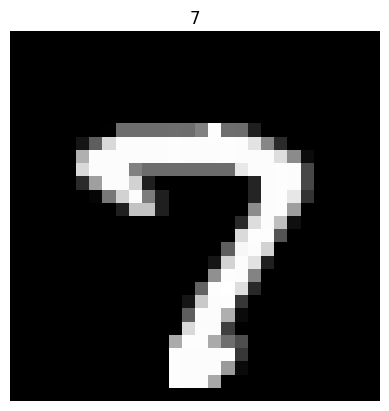

In [8]:
plt.imshow(train_images[52])
plt.title(train_labels[52])
plt.axis("off")
plt.show()

### Visualizing the data distribution

In [13]:
df = pd.DataFrame(np.unique(train_labels, return_counts=True)).T
dict = {0: "Label", 1: "Count"}
df.rename(columns=dict, inplace=True)
df

,Label,Count
0,0,5923
1,1,6742
2,2,5958
3,3,6131
4,4,5842
5,5,5421
6,6,5918
7,7,6265
8,8,5851
9,9,5949


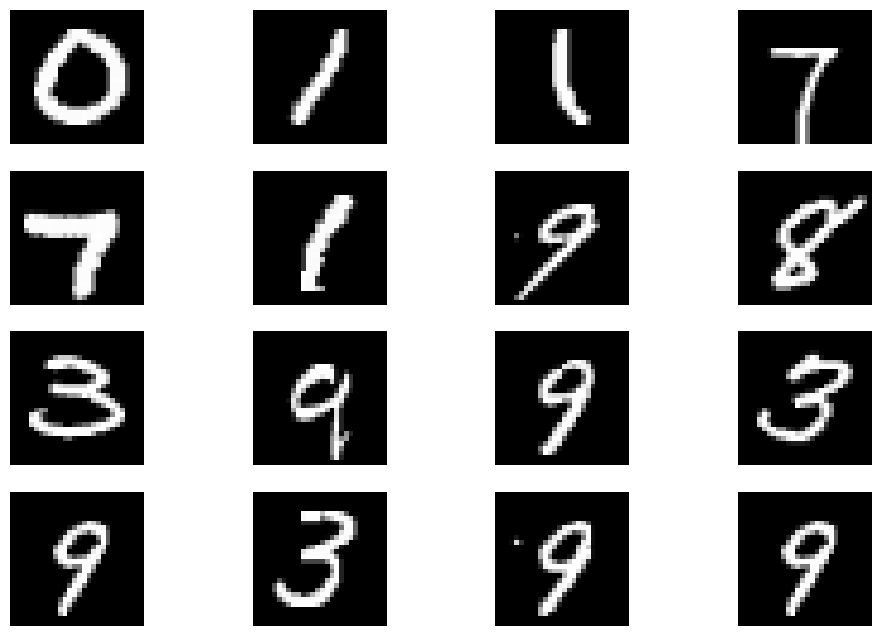

In [16]:
fig, axes = plt.subplots(4, 4, figsize=(12, 8))

for row in range(4):
    for column in range(4):
        axes[row][column].imshow(train_images[random.randint(400, 500)])
        axes[row][column].axis("off")

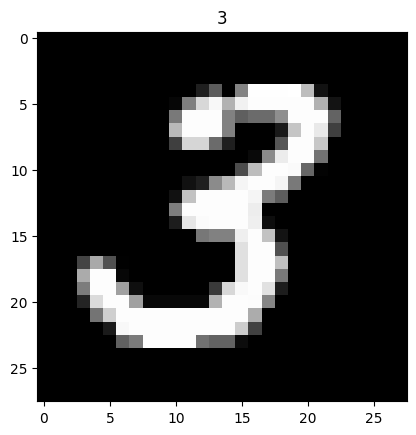

In [18]:
plt.imshow(train_images[255])
plt.title(train_labels[255])
plt.show()

In [19]:
# normalize data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Building the model

In [20]:
model = Sequential(
    [
        Flatten(input_shape=(28, 28)),
        Dense(64, activation="relu"),
        Dense(10, activation="softmax")
    ]
)

c:\Users\Usuario iTC\Desktop\handwritten-MNIST\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8637 - loss: 0.4948
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9506 - loss: 0.1692
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9655 - loss: 0.1157
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9742 - loss: 0.0887
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9783 - loss: 0.0721


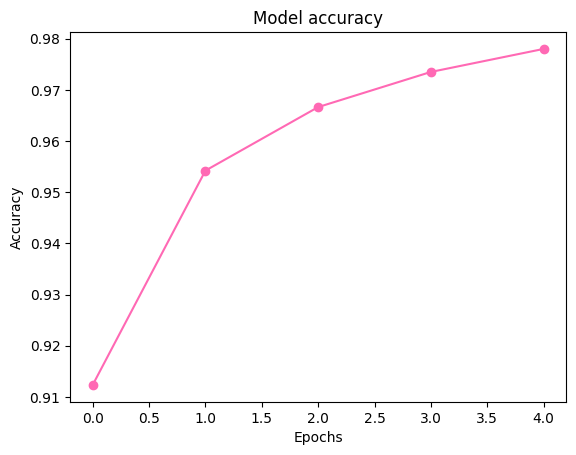

In [25]:
# plot the accuracy
plt.plot(history.history["accuracy"], marker="o", color="hotpink")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

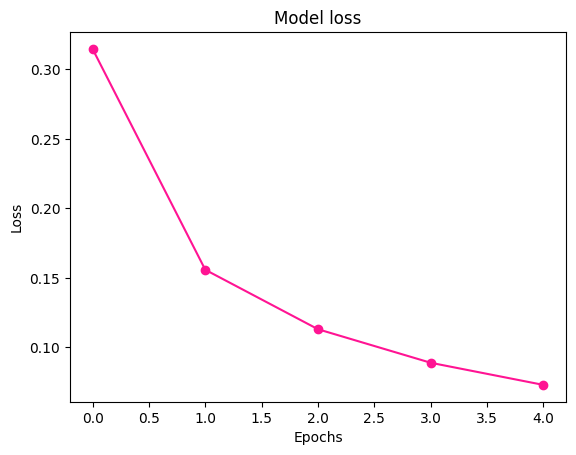

In [27]:
# plot the loss
plt.plot(history.history["loss"], marker="o", color="deeppink")
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

### Evaluating the model

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9662 - loss: 0.1078
0.972000002861023


### Model prediction

In [29]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [30]:
print(type(predictions))
print(predictions.shape)

<class 'numpy.ndarray'>
(10000, 10)


In [31]:
predictions[0].round()

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [32]:
np.argmax(predictions[0]), test_labels[0]

(7, 7)

Text(0.5, 1.0, '7')

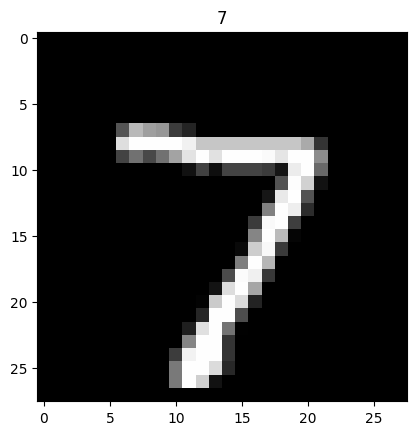

In [34]:
plt.imshow(test_images[0])
plt.title(np.argmax(predictions[0]))